In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Data/Drowsiness_dataset.csv')




# terms = []
# for item in df['drowsiness']:
#     if item not in terms:
#         terms.append(item)
#         print(item)

# terms = sorted(terms)
# print(terms)


In [3]:
df['drowsiness'].to_numpy()[np.where(df['drowsiness'].to_numpy() == 2)] = 1
df['drowsiness'].to_numpy()[np.where(df['drowsiness'].to_numpy() == 3)] = 1
df['drowsiness'].to_numpy()[np.where(df['drowsiness'].to_numpy() == 4)] = 1

df['drowsiness'].to_numpy()[np.where(df['drowsiness'].to_numpy() == 5)] = 2
df['drowsiness'].to_numpy()[np.where(df['drowsiness'].to_numpy() == 6)] = 2

df['drowsiness'].to_numpy()[np.where(df['drowsiness'].to_numpy() == 7)] = 3
df['drowsiness'].to_numpy()[np.where(df['drowsiness'].to_numpy() == 8)] = 3
df['drowsiness'].to_numpy()[np.where(df['drowsiness'].to_numpy() == 9)] = 3


In [ ]:
df['drowsiness'].to_numpy()[np.where(df['drowsiness'].to_numpy() == 2)] = 1
df['drowsiness'].to_numpy()[np.where(df['drowsiness'].to_numpy() == 3)] = 1
df['drowsiness'].to_numpy()[np.where(df['drowsiness'].to_numpy() == 4)] = 1
df['drowsiness'].to_numpy()[np.where(df['drowsiness'].to_numpy() == 5)] = 1

df['drowsiness'].to_numpy()[np.where(df['drowsiness'].to_numpy() == 6)] = 2
df['drowsiness'].to_numpy()[np.where(df['drowsiness'].to_numpy() == 7)] = 2
df['drowsiness'].to_numpy()[np.where(df['drowsiness'].to_numpy() == 8)] = 2
df['drowsiness'].to_numpy()[np.where(df['drowsiness'].to_numpy() == 9)] = 2

In [4]:
# df['drowsiness'] = df['drowsiness'].replace(np.unique(df['drowsiness'].to_numpy()), np.arange(8))

df['drowsiness'] = df['drowsiness'].replace(np.unique(df['drowsiness'].to_numpy()), np.arange(3))

In [5]:
one_hot = pd.get_dummies(df['drowsiness'])

In [6]:
num_of_frames = 10

In [7]:
import tensorflow as tf

In [113]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.LSTM(500, input_shape=[12, 12]))
# model.add(tf.keras.layers.Dense(8, activation='softmax'))
# # model.add(tf.keras.layers.LSTM(55, input_shape=[5, 5]))
# # model.add(tf.keras.layers.Dense(55, activation='softmax'))
# model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])


# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.LSTM(500, input_shape=[8, 12]))
# model.add(tf.keras.layers.Dense(8, activation='softmax'))
# # model.add(tf.keras.layers.LSTM(55, input_shape=[5, 5]))
# # model.add(tf.keras.layers.Dense(55, activation='softmax'))
# model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])


# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.LSTM(400, input_shape=[8, 12]))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['MSE'])
# cross_entropy

In [8]:
model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.LSTM(500, input_shape=[8, 12]))
model.add(tf.keras.layers.LSTM(500, input_shape=[num_of_frames, 12]))
# model.add(tf.keras.layers.Dense(8, activation='softmax'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])





# model.add(tf.keras.layers.Conv2D(10, 2, input_shape=[10, num_of_frames, 1]))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Reshape([36, 10]))
# model.add(tf.keras.layers.LSTM(150))
# model.add(tf.keras.layers.Dense(8, activation='softmax'))
# model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])




# model.add(tf.keras.layers.Conv2D(10, 2, input_shape=[10, 5, 1]))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Reshape([36, 10]))
# model.add(tf.keras.layers.LSTM(150))
# model.add(tf.keras.layers.Dense(55, activation='softmax'))
# model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [9]:
x = df.drop(['time', 'drowsiness'], axis=1).to_numpy()
# x = x[:21000].reshape([-1, 8, 12])
x = x[:21000].reshape([-1, num_of_frames, 12])
# y = df['drowsiness'].to_numpy()
# y = y[:21000]
# # y = y.reshape([-1, 8])
# y = y.reshape([-1, 20])

print(x.shape)
# print(y.shape)

(2100, 10, 12)


In [10]:
y = one_hot[:21000].to_numpy()
# y = y.reshape([-1, 8, 8])
# y = y.reshape([-1, num_of_frames, 8])
y = y.reshape([-1, num_of_frames, 3])
y = np.sum(y, 1)
print(y)
for label in y:
    max_value_index = np.argmax(label)
    label[max_value_index] = 1
    label[0:max_value_index] = 0
    label[max_value_index + 1:] = 0
    
# print('*******************************************************')
# for item in y:
#     print(item)
# y[y > 1] = 1

print(x.shape)
print(y.shape)

[[10  0  0]
 [10  0  0]
 [10  0  0]
 ...
 [ 0  0 10]
 [ 0  0 10]
 [ 0  0 10]]
(2100, 10, 12)
(2100, 3)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)

(1470, 10, 12)
(1470, 3)


In [ ]:
history = model.fit(X_train, y_train, epochs=50)

In [13]:
model.evaluate(X_test, y_test)

20/20 [==============================] - 0s 19ms/step - loss: 0.5150 - accuracy: 0.6349


[0.5149700045585632, 0.6349206566810608]

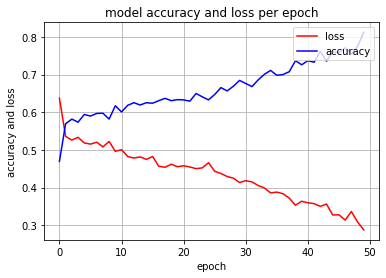

In [15]:
model.summary()

In [16]:
#save entire model to HDF5 file
model.save('LSTM_saved_model.h5')
#Recreate the exact same model, including weights and optimizer
new_model = tf.keras.models.load_model('LSTM_saved_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 500)               1026000   
_________________________________________________________________
dense (Dense)                (None, 3)                 1503      
Total params: 1,027,503
Trainable params: 1,027,503
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# df = pd.read_csv('BLE_rssi_V12.csv')
# df = pd.read_csv('Data/BLE_rssi_after_FFT_Filter_Grid_1.5m_2.5m.csv')
df = pd.read_csv('Data/Drowsiness_dataset.csv')


In [ ]:
df['drowsiness'] = df['drowsiness'].replace(np.unique(df['drowsiness'].to_numpy()), np.arange(8))

In [ ]:
## Y calculation
one_hot = pd.get_dummies(df['drowsiness'])
y = one_hot[:21000].to_numpy()
y = y.reshape([-1, 10, 8])
# y = y.reshape([-1, 20, 8])
y = np.sum(y, 1)
y[y > 1] = 1

x = df.drop(['time', 'drowsiness'], axis=1).to_numpy()
x = x[:21000].reshape([-1, 10, 12, 1])
# x = x[:21000].reshape([-1, 20, 12, 1])

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(10, 2, input_shape=[10, 12, 1]))
# model.add(tf.keras.layers.Conv2D(20, 2, input_shape=[20, 12, 1]))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Reshape([99, 10]))
# model.add(tf.keras.layers.Reshape([209, 20]))
model.add(tf.keras.layers.LSTM(500))
model.add(tf.keras.layers.Dense(8, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=12)


print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

In [ ]:
history = model.fit(X_train, y_train, epochs=90)

In [ ]:
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 27ms/step - loss: 0.3903 - accuracy: 0.5357


[0.3903229832649231, 0.5357142686843872]

In [71]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 500)               1026000   
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 4008      
Total params: 1,030,008
Trainable params: 1,030,008
Non-trainable params: 0
_________________________________________________________________


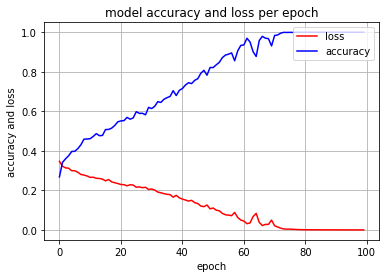

In [72]:
fig = plt.figure()
plt.plot(history.history['loss'],'r')
plt.plot(history.history['accuracy'],'b')
plt.title('model accuracy and loss per epoch')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.grid()

In [73]:
#save entire model to HDF5 file
model.save('LSTM_saved_model.h5')
#Recreate the exact same model, including weights and optimizer
new_model = tf.keras.models.load_model('LSTM_saved_model.h5')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 500)               1026000   
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 4008      
Total params: 1,030,008
Trainable params: 1,030,008
Non-trainable params: 0
_________________________________________________________________


(1407, 10, 12, 1)
(693, 10, 12, 1)
(1407, 8)
(693, 8)


11/11 [==============================] - 4s 374ms/step - loss: 0.3402 - accuracy: 0.2939


[0.34022918343544006, 0.29394811391830444]